In [87]:
# install necessary libraries for data visualization
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install cufflinks
# !pip install folium
# !pip install geopy
# !pip install statsmodels

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# read the data
df_attacked = pd.read_csv('data/lockbit2-v3.csv')
df_attacked.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded
0,645654cf7adef2f79c969d2d,0.0,joysonsafety.com,active,We took 20TB of data from the company and are ...,United States,"11 May, 2023 19:57:59 UTC",Joyson Safety Systems is a global leader in mo...,Joyson Safety Systems,NaN,...,2023-05-10T15:19:12.989Z,42.660212,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-83.243045,NaN,NaN,lockbit,"[""WordPress""]",3562,NaN
1,645654d37adef2f79c969d2e,4.0,layherna.com,active,Layher North America is a company that operate...,United States,"10 May, 2023 07:41:18 UTC",Layher is the world's largest producer and lea...,LAYHER INC,NaN,...,2023-05-10T15:19:12.989Z,29.649757,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-95.258255,NaN,200M - 1B,lockbit,"[""Amazon Cloudfront"",""Google Tag Manager"",""Sal...",3618,1986.0
2,645654e37adef2f79c969d2f,0.0,fullertonindia.com,active,"Founded in 1994 and headquartered in Mumbai, I...",India,"03 May, 2023 19:34:31 UTC",Fullerton India Credit Company Limited is regi...,Fullerton India Credit Company Limited,NaN,...,2023-05-10T15:19:12.989Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,NaN,> 1B,lockbit,"[""Amazon Cloudfront"",""CloudFlare"",""Google Doub...",8453,1994.0
3,645654e77adef2f79c969d30,0.0,triaflex.at,active,Welcome to TRIAFLEX\r\nWe design the ergonomic...,Austria,"17 May, 2023 15:44:34 UTC",NaN,Triaflex Innovative Sitz-und Gesundheitssysteme,NaN,...,2023-05-10T15:19:12.989Z,48.297900,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,14.277070,NaN,NaN,lockbit,"[""Google Analytics"",""Google Tag Manager""]",3812,NaN
4,645654ea7adef2f79c969d31,0.0,cydsa.com,active,"Cydsa, S.A.B. de C.V., together its subsidiari...",Mexico,"08 May, 2023 01:15:09 UTC",Cydsa SAB de CV (Cydsa) is a Mexico-based hold...,Cydsa SAB de CV,1690.0,...,2023-05-10T15:19:12.989Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,448319548.0,200M - 1B,lockbit,"[""MaxCDN"",""WordPress""]",4383,1945.0


In [89]:
df_unattacked = pd.read_csv('data/unattacked.csv')
df_unattacked.head()

,_id,link,last_seen,ispublished,views,deadline,company_name,content,source,branches_count,...,revenue_range,employees_range,year_founded,description,longitude,latitude,company_status,revenue,employees_count,technologies_used
0,NaN,NaN,NaN,NaN,NaN,NaN,http://peri.com,NaN,NaN,0,...,> 1B,"5,000 - 10,000",1969.0,"PERI | 134,243 followers on LinkedIn. Formwork...",NaN,NaN,active,NaN,NaN,"['Google Analytics', 'Google DoubleClick', 'Go..."
1,NaN,NaN,NaN,NaN,NaN,NaN,http://mahindrafinance.com,NaN,NaN,0,...,> 1B,"> 10,000",1991.0,Mahindra & Mahindra Financial Services Limited...,NaN,NaN,active,1.527740e+09,21790.0,"['CloudFlare', 'Google Tag Manager']"
2,NaN,NaN,NaN,NaN,NaN,NaN,http://ultratechapps.com,NaN,NaN,0,...,100M - 200M,"500 - 1,000",1857.0,Aditya Birla Management Corporation Pvt. Ltd. ...,NaN,NaN,active,NaN,NaN,[]
3,NaN,NaN,NaN,NaN,NaN,NaN,http://korian.fr,NaN,NaN,3,...,> 1B,"> 10,000",2003.0,"Korian SA, formerly Korian Medica SA, is a Fra...",NaN,NaN,active,3.948760e+09,48600.0,"['CloudFlare', 'Drupal', 'Google Tag Manager',..."
4,NaN,NaN,NaN,NaN,NaN,NaN,http://focusdatasolutions.com,NaN,NaN,0,...,1M - 10M,10 - 50,2001.0,"An award winning services provider, Focus Data...",NaN,NaN,active,NaN,NaN,"['CloudFlare', 'Google Tag Manager', 'WordPress']"


In [90]:
# count the number of rows and columns
print(df_attacked.shape)
print(df_unattacked.shape)

(707, 23)
(392, 23)


In [91]:
# describe the data
df_attacked.describe()

,branches_count,employees_count,latitude,longitude,revenue,views,year_founded
count,578.000000,211.000000,212.000000,212.000000,7.700000e+01,707.000000,467.000000
mean,2.531142,3080.957346,34.770710,-78.229660,1.703344e+09,17508.613861,1977.400428
std,34.947496,14853.026286,16.343709,50.479101,5.667671e+09,10819.096609,43.969706
min,0.000000,1.000000,-37.899498,-123.712351,0.000000e+00,110.000000,1333.000000
25%,0.000000,27.500000,33.493367,-104.577968,2.179678e+07,10371.000000,1967.000000
50%,0.000000,67.000000,38.595613,-84.828165,1.500000e+08,17394.000000,1987.000000
75%,1.000000,556.000000,41.906958,-75.628727,7.820046e+08,23380.500000,2001.000000
max,828.000000,161980.000000,52.236968,174.867241,4.326000e+10,136823.000000,2018.000000


In [92]:
df_unattacked.describe()

,_id,link,last_seen,ispublished,views,deadline,content,source,branches_count,year_founded,longitude,latitude,revenue,employees_count
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.000000,322.000000,160.000000,160.000000,7.800000e+01,133.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.487245,1979.757764,-87.310771,38.805036,4.781731e+09,12895.172932
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.193239,45.318090,31.507339,8.875119,1.775202e+10,44655.187923
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1636.000000,-122.826270,-26.048406,0.000000e+00,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1972.250000,-111.895730,34.525137,1.431168e+07,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1994.000000,-85.805140,40.242339,1.894154e+08,311.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2005.750000,-77.034053,42.886451,1.855000e+09,1900.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1874.000000,2022.000000,114.208168,54.928532,1.431100e+11,293752.000000


In [93]:
# check the data types
df_attacked.dtypes

_id                   object
branches_count       float64
company_name          object
company_status        object
content               object
country               object
deadline              object
description           object
display_name          object
employees_count      float64
employees_range       object
industry              object
ispublished             bool
last_seen             object
latitude             float64
link                  object
longitude            float64
revenue              float64
revenue_range         object
source                object
technologies_used     object
views                  int64
year_founded         float64
dtype: object

In [94]:
# check the missing values
df_attacked.isnull().sum()

_id                    0
branches_count       129
company_name           0
company_status       129
content                6
country              130
deadline               0
description          198
display_name         129
employees_count      496
employees_range      291
industry             179
ispublished            0
last_seen              0
latitude             495
link                   0
longitude            495
revenue              630
revenue_range        275
source                 0
technologies_used      0
views                  0
year_founded         240
dtype: int64

In [95]:
df_unattacked.isnull().sum()

_id                  392
link                 392
last_seen            392
ispublished          392
views                392
deadline             392
company_name          43
content              392
source               392
branches_count         0
display_name           0
country                7
industry              39
revenue_range         68
employees_range       89
year_founded          70
description           66
longitude            232
latitude             232
company_status         0
revenue              314
employees_count      259
technologies_used      0
dtype: int64

In [96]:
# check the number of unique values for each column
df_attacked.nunique(axis=0)

_id                  707
branches_count        20
company_name         693
company_status         1
content              698
country               67
deadline             707
description          495
display_name         564
employees_count      147
employees_range        8
industry              95
ispublished            2
last_seen              3
latitude             203
link                 707
longitude            203
revenue               62
revenue_range          7
source                 1
technologies_used    172
views                703
year_founded         115
dtype: int64

In [97]:
df_unattacked.nunique(axis=0)

_id                    0
link                   0
last_seen              0
ispublished            0
views                  0
deadline               0
company_name         335
content                0
source                 0
branches_count        27
display_name         377
country               53
industry              90
revenue_range          7
employees_range        8
year_founded         101
description          314
longitude            154
latitude             154
company_status         1
revenue               74
employees_count      116
technologies_used    179
dtype: int64

# Data Cleaning and Preparation

In [98]:
# print the unique values for 'revenue_range' column
print(df_attacked['revenue_range'].unique())
def convert_revenue_range_to_average(revenue_range):
    if pd.isnull(revenue_range):
        return revenue_range
    revenue_range = str(revenue_range)

    if '>' in revenue_range or '<' in revenue_range:
        revenue_range = revenue_range.replace('>', '')
        revenue_range = revenue_range.replace('<', '')
        revenue_range = revenue_range.replace(' ', '')
        revenue_range = revenue_range.replace('$', '')
        revenue_range = revenue_range.replace(',', '')
        if 'B' in revenue_range:
            revenue_range = revenue_range.replace('B', '')
            revenue_range = float(revenue_range) * 1e9
        elif 'M' in revenue_range:
            revenue_range = revenue_range.replace('M', '')
            revenue_range = float(revenue_range) * 1e6
        else:
            revenue_range = float(revenue_range)
        return revenue_range
    else:
        lower, upper = revenue_range.split(' - ')
        lower = lower.replace(' ', '')
        lower = lower.replace('$', '')
        lower = lower.replace(',', '')
        upper = upper.replace(' ', '')
        upper = upper.replace('$', '')
        upper = upper.replace(',', '')
        if 'B' in lower:
            lower = lower.replace('B', '')
            lower = float(lower) * 1e9
        elif 'M' in lower:
            lower = lower.replace('M', '')
            lower = float(lower) * 1e6
        else:
            lower = float(lower)
        if 'B' in upper:
            upper = upper.replace('B', '')
            upper = float(upper) * 1e9
        elif 'M' in upper:
            upper = upper.replace('M', '')
            upper = float(upper) * 1e6
        else:
            upper = float(upper)
        
        return (lower + upper) / 2
new_df = df_attacked.copy()
# convert the 'revenue_range' column from Series object to numeric
new_df['revenue_range'] = new_df['revenue_range'].apply(convert_revenue_range_to_average)
print(df_attacked['revenue_range'].unique())
print(new_df['revenue_range'].unique())
# drop the id column
new_df.drop('_id', axis=1, inplace=True)
new_df.drop('last_seen', axis=1, inplace=True)
new_df.drop('link', axis=1, inplace=True)
# show random 5 rows
new_df.sample(10)


[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M']
[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M']
[    nan 6.0e+08 1.0e+09 5.0e+05 3.0e+07 5.5e+06 1.5e+08 7.5e+07]


,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,employees_range,industry,ispublished,latitude,longitude,revenue,revenue_range,source,technologies_used,views,year_founded
457,1.0,faacgroup.com,active,Fabbrica Automatismi Apertura Cancelli (FAAC) ...,Italy,"13 Aug, 2022 04:52:58 UTC",FAAC Group provides Solutions for Access Autom...,FAAC S.p.A.,NaN,NaN,Computer Hardware,True,NaN,NaN,NaN,NaN,lockbit,"[""Google Tag Manager"",""NewRelic"",""ShareThis"",""...",20945,1965.0
474,0.0,shopper360.com.my,active,"Stolen 178GB: passports, scans, financial stat...",Malaysia,"08 Aug, 2022 11:13:06 UTC",shopper360 Limited is an investment holding co...,Shopper360 Ltd,NaN,NaN,NaN,True,NaN,NaN,39465875.0,30000000.0,lockbit,"[""Google Tag Manager"",""MaxCDN"",""WooCommerce"",""...",29372,2016.0
694,0.0,stmarys.net,active,St Mary’s Catholic School is part of the missi...,United Kingdom,"18 May, 2023 09:45:36 UTC","In 1896, five Sisters from the Belgian congreg...",St Mary's Catholic School,38.0,10 - 50,Primary/Secondary Education,False,51.869154,0.153882,NaN,5500000.0,lockbit,"[""CloudFlare"",""MaxCDN""]",1234,1896.0
404,0.0,idealtridon.com,active,Trust & quality define Ideal-Tridon's Spring L...,United States,"21 Sep, 2022 00:54:02 UTC","Browse the selection of Ideal Tridon Clamps, i...","Ideal Clamp Products, Inc.",678.0,"500 - 1,000",Machinery,True,35.933582,-86.526040,NaN,150000000.0,lockbit,"[""Google Analytics"",""Google Tag Manager"",""Pard...",19769,1913.0
609,NaN,ryokikogyo.co.jp,NaN,The establishment of the company dates back to...,NaN,"12 Dec, 2022 19:59:14 UTC",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,lockbit,[],27474,NaN
503,5.0,columbiagrain.com,active,We value every member of the Columbia Grain te...,United States,"02 Aug, 2022 12:01:22 UTC",Columbia Grain Inc. is a long time established...,"Columbia Grain, Inc.",562.0,"500 - 1,000",Warehousing,True,45.514782,-122.679756,NaN,75000000.0,lockbit,"[""Google Analytics"",""Google Tag Manager"",""Word...",33291,1978.0
273,0.0,stmc.edu.hk,active,Sha Tin Methodist College,Hong Kong,"25 Dec, 2022 00:21:41 UTC","Sha Tin Methodist College, a government subsid...",Sha Tin Methodist College,NaN,50 - 200,Primary/Secondary Education,True,NaN,NaN,NaN,30000000.0,lockbit,"[""WordPress""]",17470,1983.0
397,0.0,euro-modules.fr,active,"Sécurisant mais toujours esthétiques, les espa...",France,"29 Sep, 2022 06:24:22 UTC",La construction modulaire sur-mesure proposée ...,EURO MODULES,NaN,10 - 50,Manufacturing,True,NaN,NaN,5500000.0,5500000.0,lockbit,"[""Google Analytics"",""Google Tag Manager"",""Word...",20111,1998.0
220,0.0,bplawyers.co.id,active,BP Lawyers Corporate Law Firms merupakan Konsu...,Indonesia,"20 Feb, 2023 13:57:05 UTC",BP Lawyers is experienced and dedicated to the...,BP Lawyers Counselors at Law,NaN,10 - 50,Law Practice,True,NaN,NaN,NaN,5500000.0,lockbit,"[""Google Tag Manager"",""WordPress""]",13046,NaN
45,0.0,pkffinconta.ro,active,The PKF Finconta Group consists of four compan...,Romania,"26 Apr, 2023 08:15:56 UTC","PKF Finconta, one of the first 10 profile comp...",PKF Finconta,29.0,10 - 50,Financial Services,True,NaN,NaN,NaN,5500000.0,lockbit,"[""WordPress""]",4899,1994.0


In [99]:
new_df_unattacked = df_unattacked.copy()
# convert the 'revenue_range' column from Series object to numeric
new_df_unattacked['revenue_range'] = new_df_unattacked['revenue_range'].apply(convert_revenue_range_to_average)
print(df_unattacked['revenue_range'].unique())
print(new_df_unattacked['revenue_range'].unique())
# drop the id column
new_df_unattacked.drop('_id', axis=1, inplace=True)
new_df_unattacked.drop('last_seen', axis=1, inplace=True)
new_df_unattacked.drop('link', axis=1, inplace=True)
# show random 5 rows
new_df_unattacked.sample(10)

['> 1B' '100M - 200M' '1M - 10M' '50M - 100M' nan '0 - 1M' '200M - 1B'
 '10M - 50M']
[1.0e+09 1.5e+08 5.5e+06 7.5e+07     nan 5.0e+05 6.0e+08 3.0e+07]


,ispublished,views,deadline,company_name,content,source,branches_count,display_name,country,industry,revenue_range,employees_range,year_founded,description,longitude,latitude,company_status,revenue,employees_count,technologies_used
276,NaN,NaN,NaN,http://g1ant.com,NaN,NaN,0,G1ANT,United Kingdom,Information Technology and Services,5.500000e+06,10 - 50,2015.0,"G1ANT | 1,787 followers on LinkedIn. Scale you...",-0.255299,51.525450,active,NaN,29.0,"['Google Tag Manager', 'WordPress']"
183,NaN,NaN,NaN,http://hm.com,NaN,NaN,0,H & M Hennes & Mauritz AB,Sweden,Retail,1.000000e+09,"> 10,000",1947.0,H & M Hennes & Mauritz AB is a Sweden-based co...,NaN,NaN,active,2.378306e+10,179000.0,"['Akamai', 'CloudFlare', 'Fastly', 'Optimizely']"
311,NaN,NaN,NaN,http://trustis.com,NaN,NaN,0,TRUSTIS LIMITED,United Kingdom,Computer Software,5.500000e+06,10 - 50,1998.0,Entrust keeps the world moving safely by enabl...,NaN,NaN,active,NaN,NaN,"['CloudFlare', 'Google Tag Manager', 'Maxymise..."
133,NaN,NaN,NaN,http://energy-equipment.com,NaN,NaN,0,Energy Equipment Corporation,United States,NaN,5.500000e+06,NaN,1985.0,NaN,-95.458755,29.842333,active,3.000000e+06,NaN,[]
152,NaN,NaN,NaN,http://illinois.gov,NaN,NaN,13,State of Illinois,United States,Government Administration,1.500000e+08,NaN,2022.0,"Find places to go, things to see. Search throu...",-87.646220,41.949043,active,1.894154e+08,NaN,"['Google Analytics', 'Google DoubleClick', 'Go..."
128,NaN,NaN,NaN,NaN,NaN,NaN,0,dwpIAustralia,Australia,Architecture & Planning,3.000000e+07,200 - 500,1958.0,NaN,NaN,NaN,active,NaN,NaN,[]
270,NaN,NaN,NaN,http://uaeinteract.com,NaN,NaN,0,UAE Armed Forces,United Arab Emirates,Military,1.000000e+09,"5,000 - 10,000",NaN,UAE INTERACT has been described as the most co...,NaN,NaN,active,NaN,NaN,"['AddThis', 'Google Analytics']"
59,NaN,NaN,NaN,http://allaroundjanitorial.com,NaN,NaN,0,ALL AROUND JANITORIAL LLC,United States,NaN,5.000000e+05,1 - 10,2005.0,NaN,NaN,NaN,active,NaN,NaN,[]
177,NaN,NaN,NaN,http://useinsider.com,NaN,NaN,0,Insider,United Kingdom,Computer Software,7.500000e+07,200 - 500,2012.0,"Insider's CDP connects customer data, predicts...",NaN,NaN,active,NaN,NaN,"['Google Analytics', 'Google DoubleClick', 'Go..."
265,NaN,NaN,NaN,http://hziegler.com,NaN,NaN,0,Helen Ziegler and Associates,Canada,Hospital & Health Care,5.500000e+06,1 - 10,1981.0,HZA recruits individuals from the United State...,-79.389798,43.654818,active,4.035899e+06,10.0,"['Google Analytics', 'Google DoubleClick']"


In [100]:
print(new_df['employees_range'].unique())
# process the 'employees_range' column
def convert_range_employee_to_average(employees_range):
  if pd.isnull(employees_range):
    return employees_range
  employees_range = str(employees_range)
  if '>' in employees_range or '<' in employees_range:
    employees_range = employees_range.replace('>', '')
    employees_range = employees_range.replace('<', '')
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    if 'K' in employees_range:
      employees_range = employees_range.replace('K', '')
      employees_range = int(employees_range) * 1e3
    elif 'M' in employees_range:
      employees_range = employees_range.replace('M', '')
      employees_range = int(employees_range) * 1e6
    else:
      employees_range = int(employees_range)
    return employees_range
  elif '-' in employees_range:
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    employees_range = employees_range.split('-')
    lower = float(employees_range[0])
    upper = float(employees_range[1])
  else:
    lower = float(employees_range)
    upper = float(employees_range)

  return (lower + upper) / 2

new_df['employees_range'] = new_df['employees_range'].apply(convert_range_employee_to_average)
new_df['employees_range'].unique()

new_df_unattacked['employees_range'] = new_df_unattacked['employees_range'].apply(convert_range_employee_to_average)
new_df_unattacked['employees_range'].unique()

[nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000']


array([7.50e+03, 1.00e+04, 7.50e+02, 3.00e+01, 3.50e+02,      nan,
       3.00e+03, 5.50e+00, 1.25e+02])

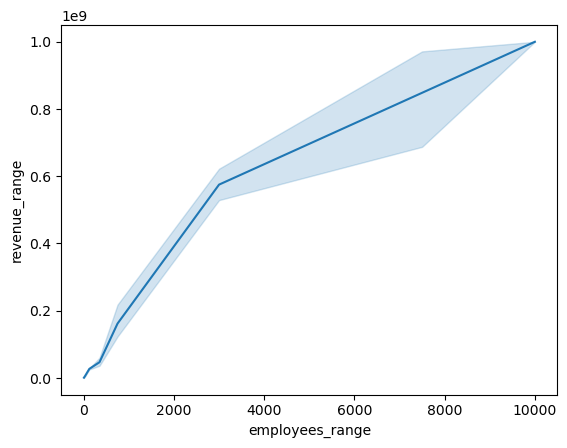

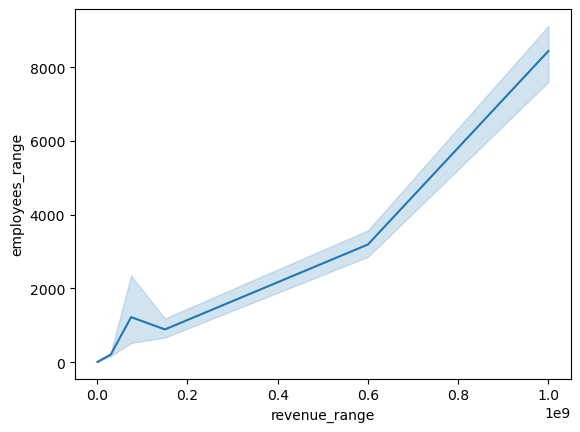

In [101]:
# plot the raltionship between 'revenue_range' and 'employees_range' using a line plot
# remove the rows with missing values in 'revenue_range' and 'employees_range' columns
new_df = new_df.dropna(subset=['revenue_range', 'employees_range'])
sns.lineplot(x='employees_range', y='revenue_range', data=new_df)
plt.show()
sns.lineplot(x='revenue_range', y='employees_range', data=new_df)
plt.show()

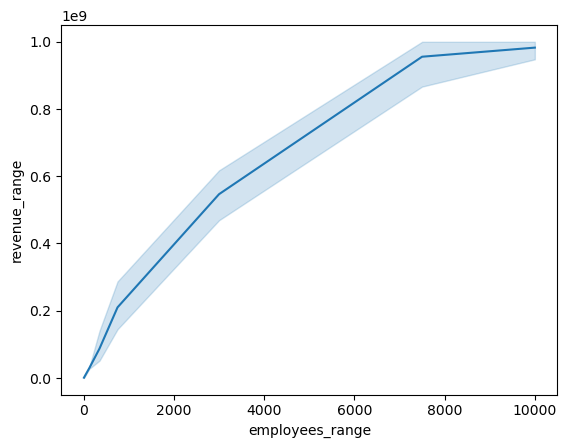

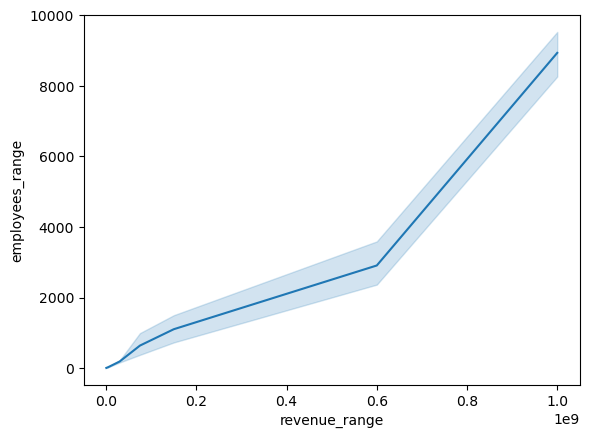

In [102]:
new_df_unattacked = new_df_unattacked.dropna(subset=['revenue_range', 'employees_range'])
sns.lineplot(x='employees_range', y='revenue_range', data=new_df_unattacked)
plt.show()
sns.lineplot(x='revenue_range', y='employees_range', data=new_df_unattacked)
plt.show()

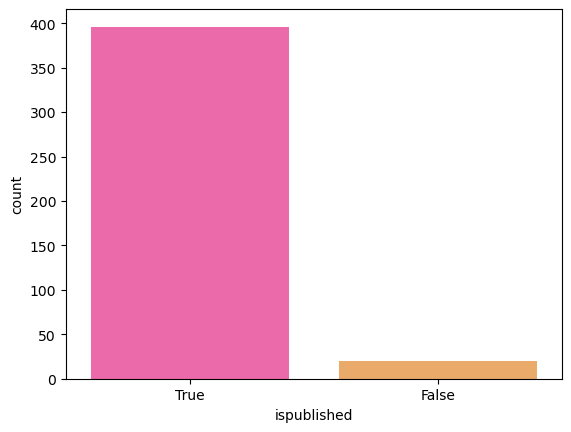

In [103]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
sns.countplot(x='ispublished', data=new_df, palette='spring', linewidth=1, order=new_df['ispublished'].value_counts().index)
plt.show()

# EDA

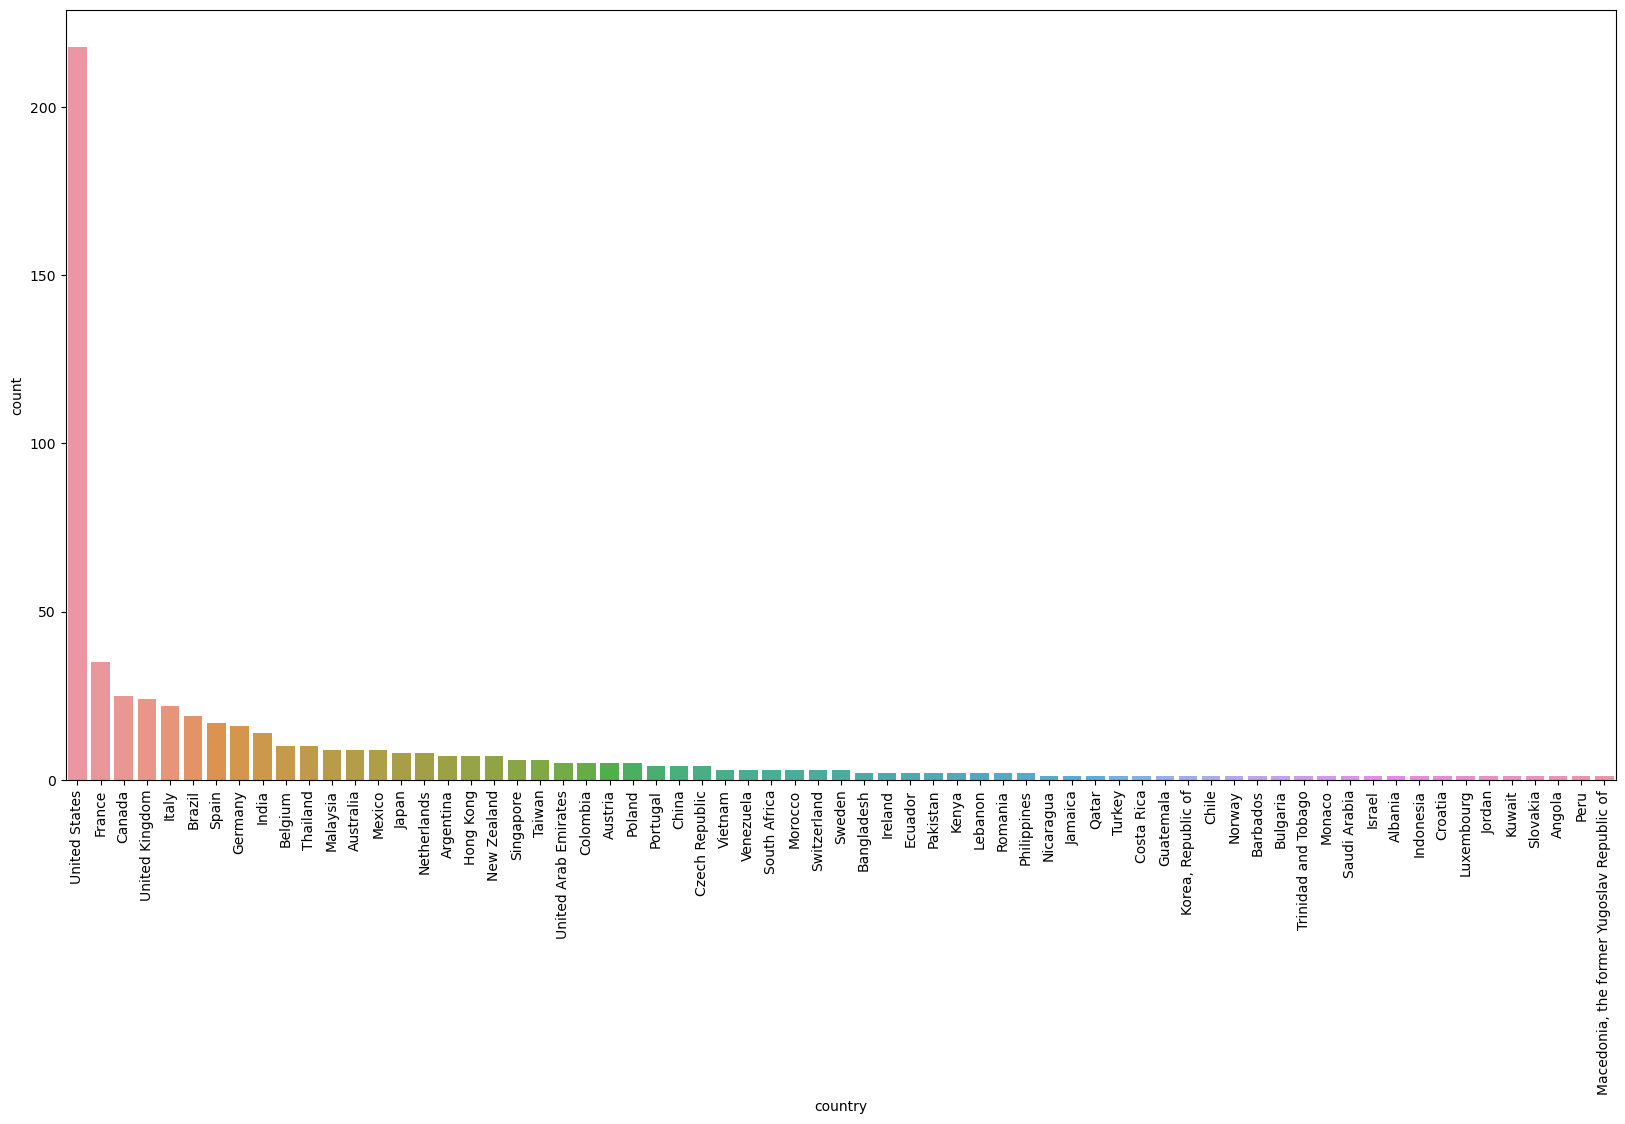

In [104]:
# plot the number of samples for each country and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=df_attacked, order=df_attacked['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

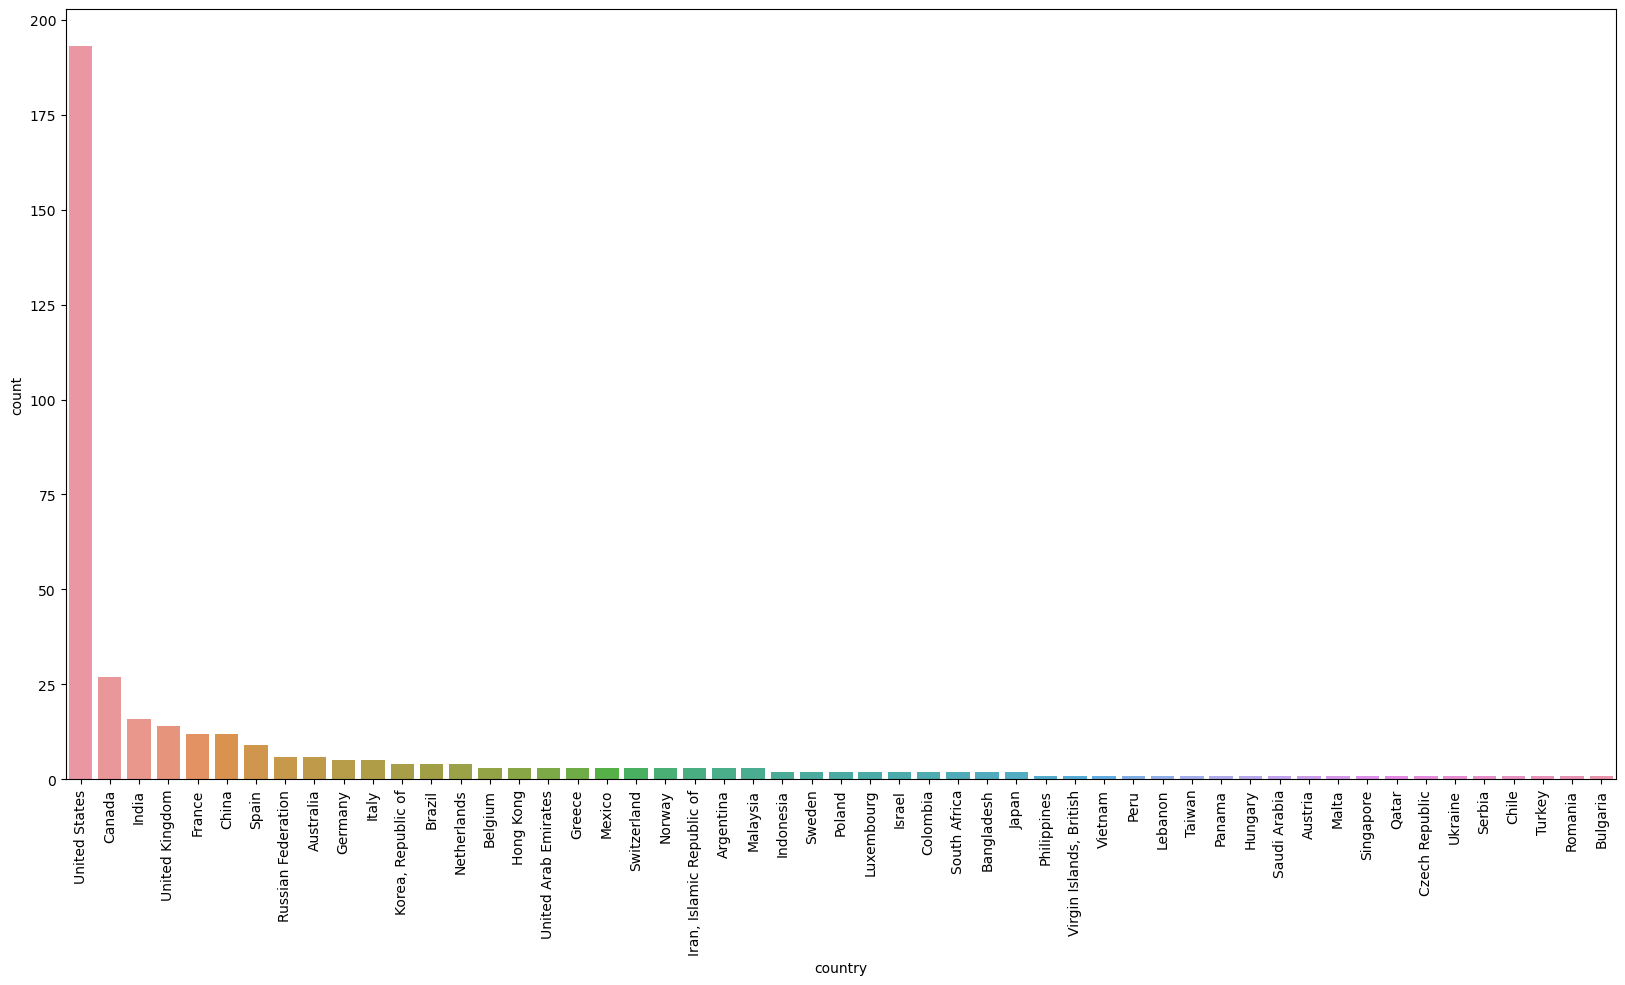

In [105]:
#unattacked companies
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=df_unattacked, order=df_unattacked['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

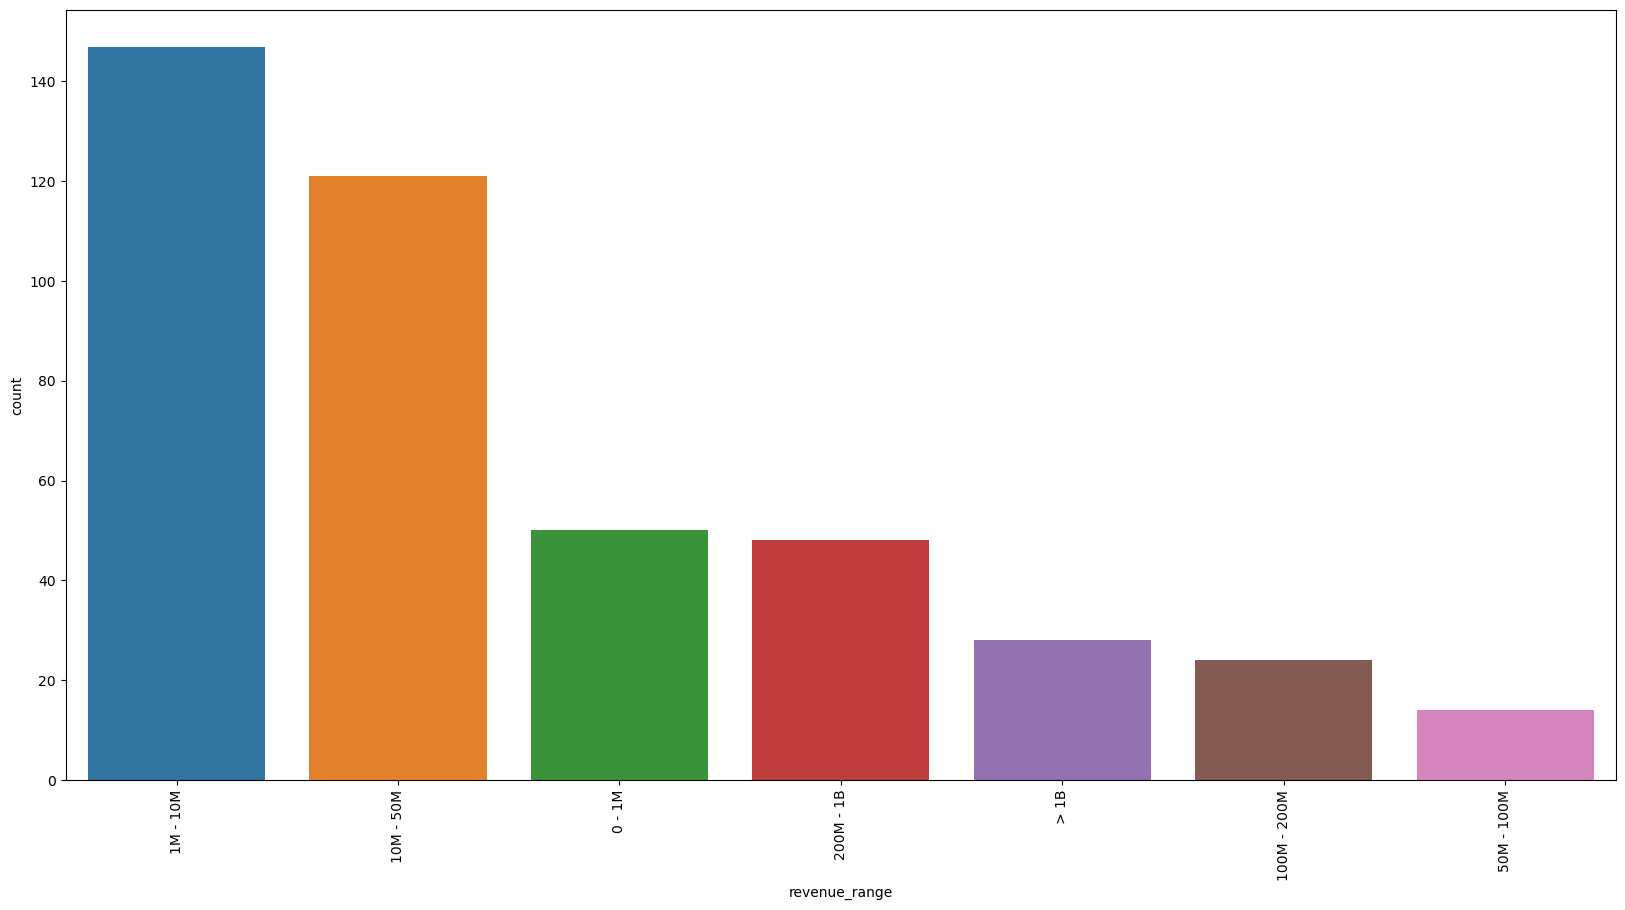

In [106]:
# group the data by revenue_range and count the number of samples for each revenue_range
df_attacked.groupby('revenue_range').size()
# plot the number of samples for each revenue_range
plt.figure(figsize=(20, 10))
sns.countplot(x='revenue_range', data=df_attacked, order=df_attacked['revenue_range'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

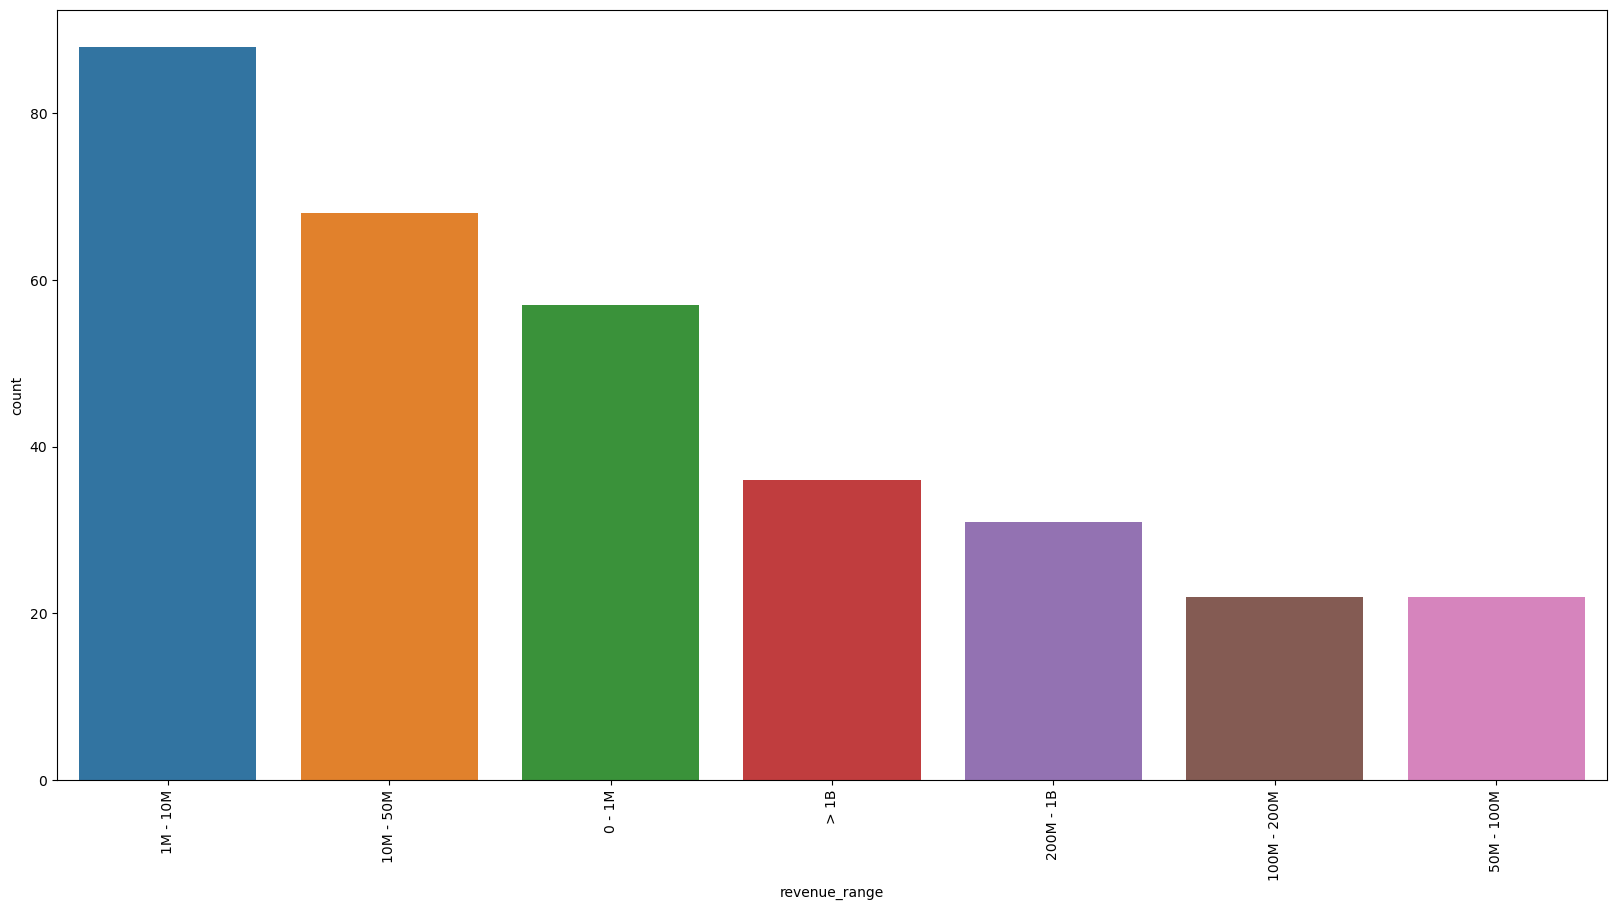

In [107]:
# unattacked campanies
df_unattacked.groupby('revenue_range').size()
plt.figure(figsize=(20, 10))
sns.countplot(x='revenue_range', data=df_unattacked, order=df_unattacked['revenue_range'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

0
0                                        ["WordPress"]
1    ["Amazon Cloudfront","Google Tag Manager","Sal...
2    ["Amazon Cloudfront","CloudFlare","Google Doub...
3            ["Google Analytics","Google Tag Manager"]
4                               ["MaxCDN","WordPress"]
Name: technologies_used, dtype: object
182
Index(['_id', 'branches_count', 'company_name', 'company_status', 'content',
       'country', 'deadline', 'description', 'display_name', 'employees_count',
       'employees_range', 'industry', 'ispublished', 'last_seen', 'latitude',
       'link', 'longitude', 'revenue', 'revenue_range', 'source',
       'technologies_used', 'views', 'year_founded'],
      dtype='object')
(525, 23)
0                                        ["WordPress"]
1    ["Amazon Cloudfront", "Google Tag Manager", "S...
2    ["Amazon Cloudfront", "CloudFlare", "Google Do...
3           ["Google Analytics", "Google Tag Manager"]
4                              ["MaxCDN", "WordPress"]
Name: technologies

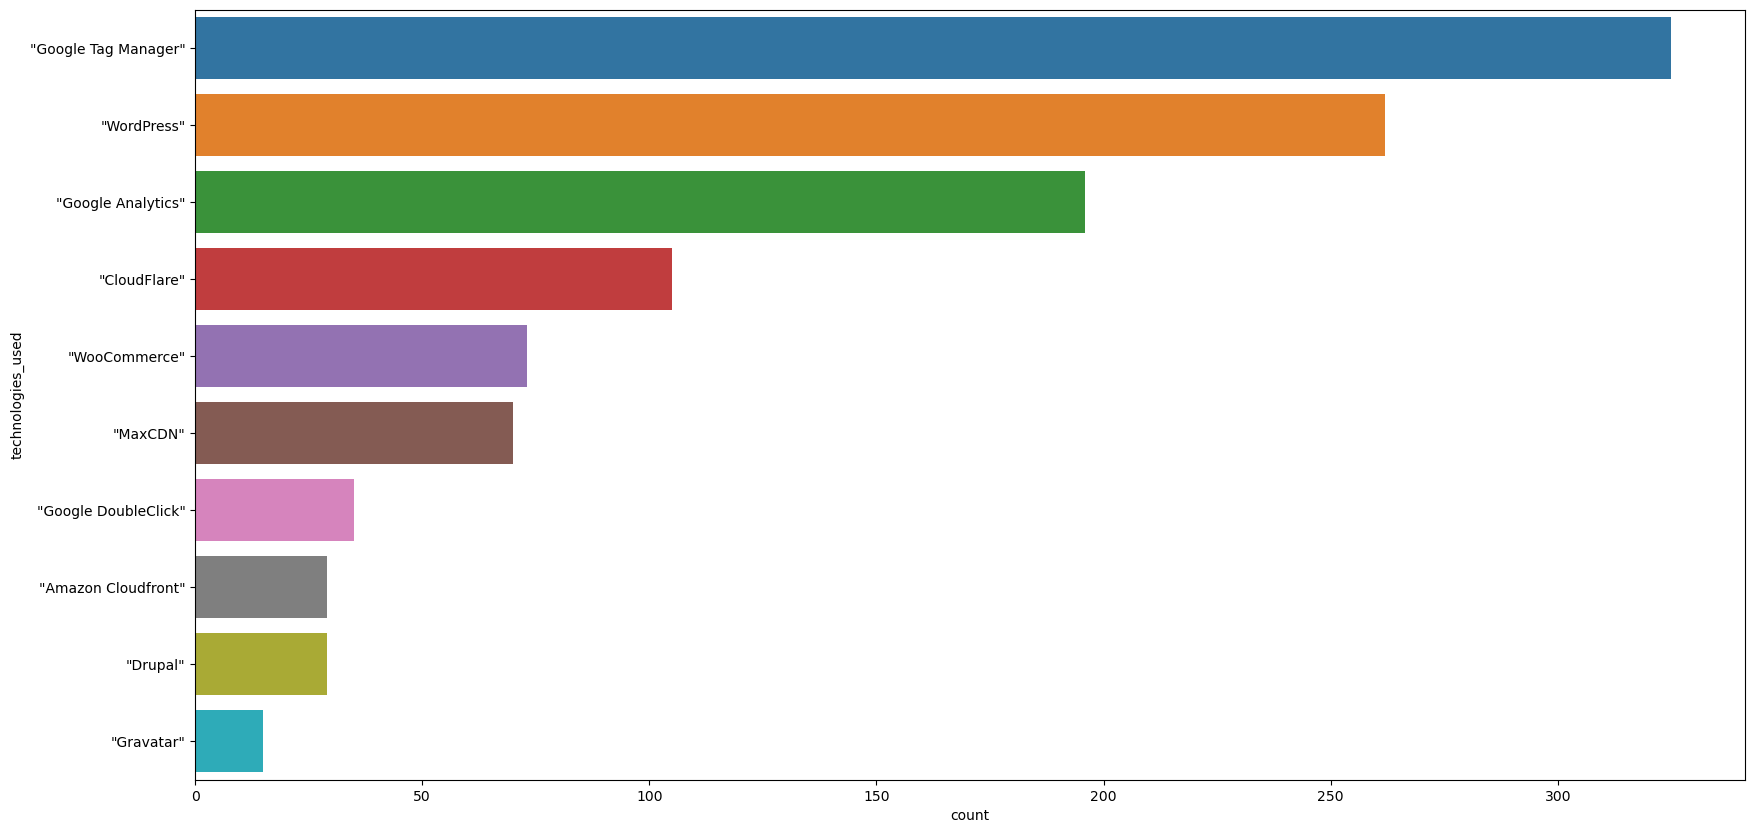

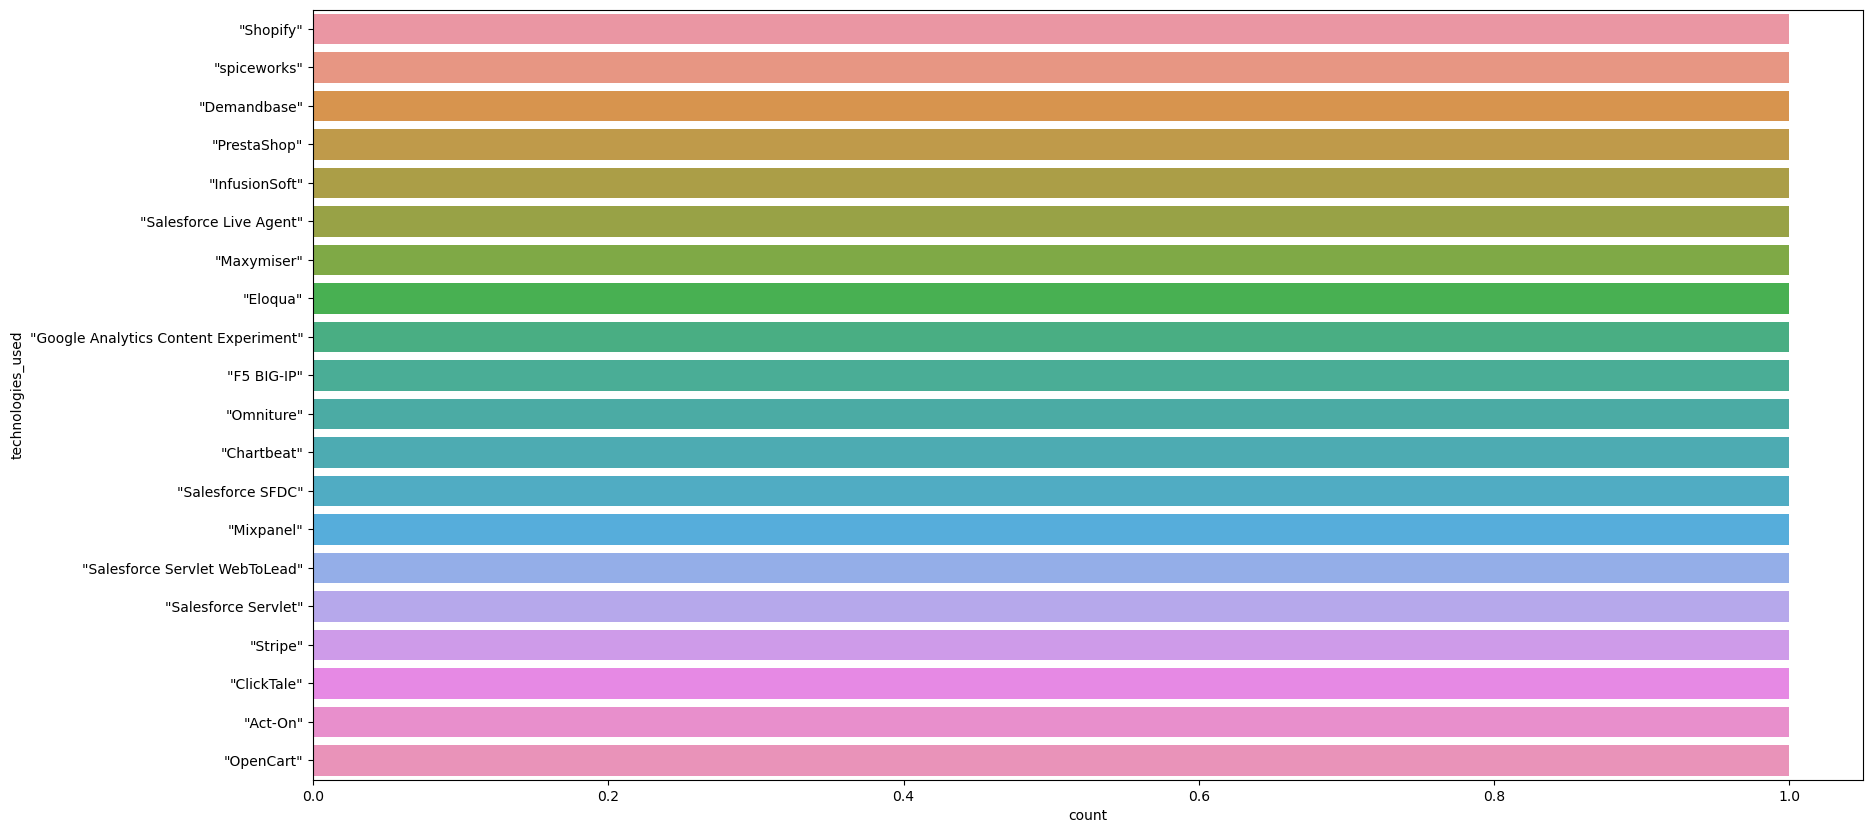

57


In [108]:
# count the number of empty lists in the `technologies_used` column
# count nulls first
print(df_attacked['technologies_used'].isnull().sum())

col = df_attacked['technologies_used'].dropna()
# count empty lists
print(col.head())
# 
new_col = col.apply(lambda x:  1 if len(x)== 2 else 0)
print(new_col.sum())
col2= df_attacked.copy()
# drop nulls in the `technologies_used` column
col2.dropna(subset=['technologies_used'], inplace=True)
print(col2.columns)
new_col2 = col2[col2["technologies_used"]!="[]"]
print(new_col2.shape)

techs = new_col2['technologies_used'].apply(lambda x: x[1:-1].split(','))
print(techs.head())
#count each technology
techs = techs.explode()
print(techs.head())
print(techs.value_counts())
# plot the top 10 technologies used by companies
plt.figure(figsize=(20, 10))
sns.countplot(y=techs, order=techs.value_counts().iloc[:10].index)
plt.show()

# plot the least 10 technologies used by companies
plt.figure(figsize=(20, 10))
sns.countplot(y=techs, order=techs.value_counts().iloc[-20:].index)
plt.show()

print(len(techs.unique()))

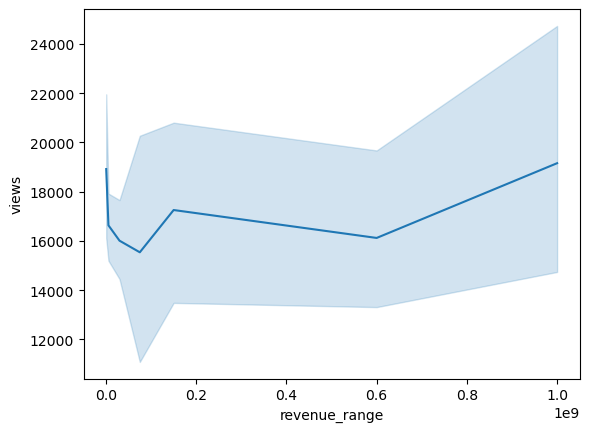

In [109]:
# line plot between 'revenue_range' and 'views' columns
sns.lineplot(x='revenue_range', y='views', data=new_df)
plt.show()

['Computer Hardware' 'Financial Services' 'Chemicals'
 'Information Technology and Services' 'Construction'
 'Architecture & Planning' 'Nonprofit Organization Management' 'Wholesale'
 'Hospital & Health Care' 'Mechanical or Industrial Engineering'
 'Law Practice' 'Printing' 'Telecommunications'
 'Marketing and Advertising' 'Food Production' 'Civil Engineering'
 'Manufacturing' 'Mining & Metals' 'Management Consulting'
 'Computer Software' 'Mental Health Care' 'Oil & Energy' 'Real Estate'
 'Pharmaceuticals' 'Legal Services' 'Maritime' 'Government Relations'
 'Retail' nan 'Machinery' 'Medical Devices' 'Health, Wellness and Fitness'
 'Transportation/Trucking/Railroad' 'Facilities Services' 'Furniture'
 'Logistics and Supply Chain' 'Government Administration' 'Internet'
 'Apparel & Fashion' 'Package/Freight Delivery' 'Staffing and Recruiting'
 'Accounting' 'Consumer Services' 'International Trade and Development'
 'Restaurants' 'Civic & Social Organization'
 'Recreational Facilities and Se

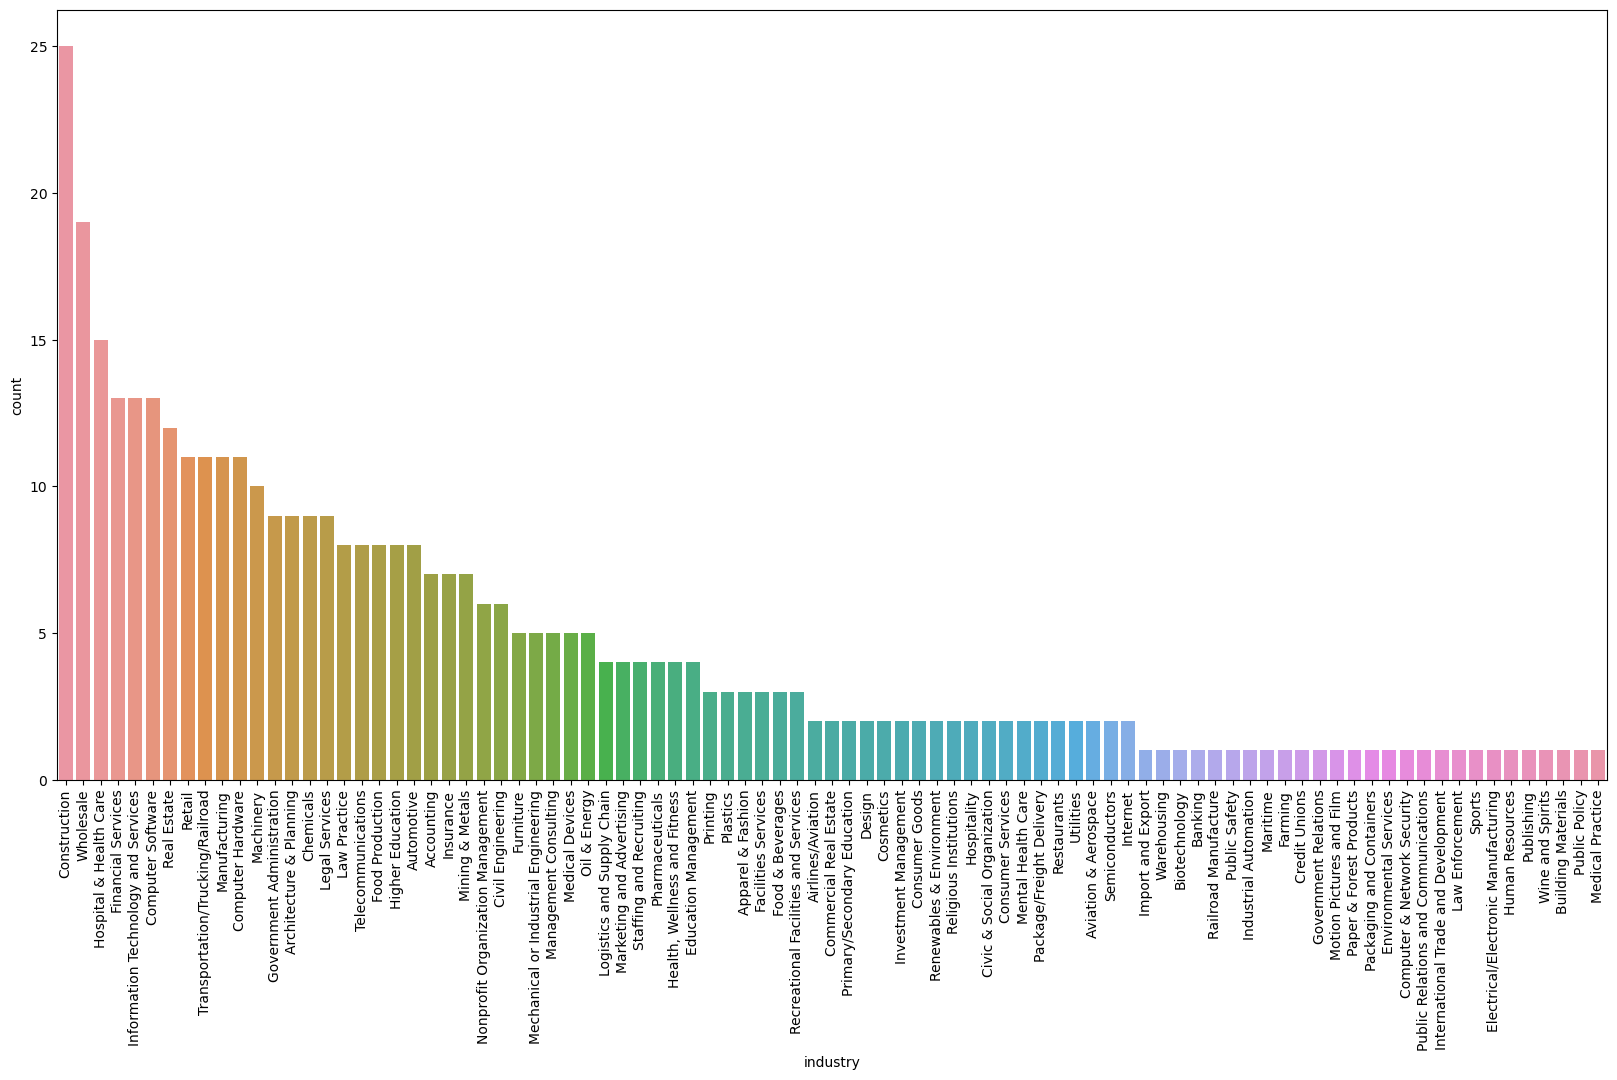

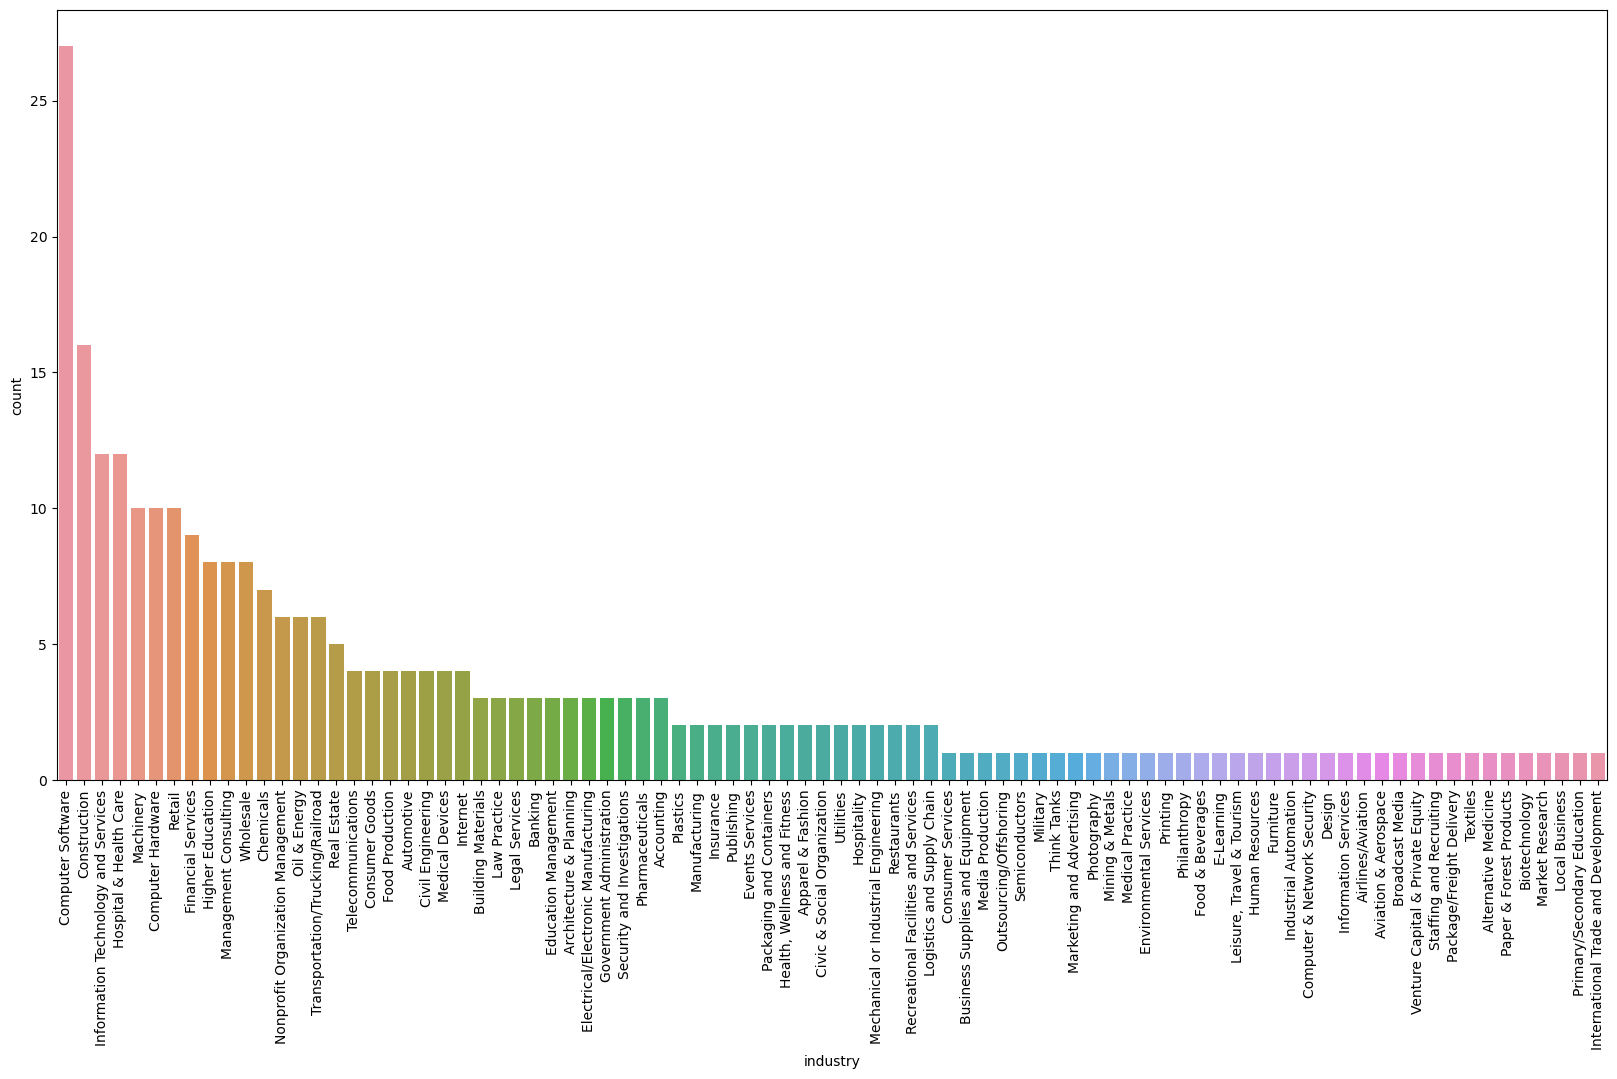

In [110]:
# print the unique values for 'industry' column
print(new_df['industry'].unique())
# plot the number of samples for each industry and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df, order=new_df['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df_unattacked, order=new_df_unattacked['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [111]:
new_df_country_industry = df_attacked[df_attacked["country"] == "United States"]
# drop the rows with missing values in 'country' and 'industry' columns
new_df_country_industry = new_df_country_industry.dropna(subset=['country', 'industry'])
# group the data by 'country' and 'industry' and count the number of samples for each group
new_df_country_industry2 = new_df_country_industry.groupby(['country', 'industry']).size().reset_index(name='counts')
new_df_country_industry2.sorted = new_df_country_industry2.sort_values(by='counts', ascending=False)
new_df_country_industry2.sorted.head(10)

C:\Users\Nada\AppData\Local\Temp\ipykernel_3444\1940751479.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,country,industry,counts
14,United States,Construction,15
31,United States,Hospital & Health Care,13
65,United States,Wholesale,11
12,United States,Computer Hardware,11
38,United States,Legal Services,7
13,United States,Computer Software,7
48,United States,Nonprofit Organization Management,7
3,United States,Architecture & Planning,6
24,United States,Financial Services,6
30,United States,Higher Education,5


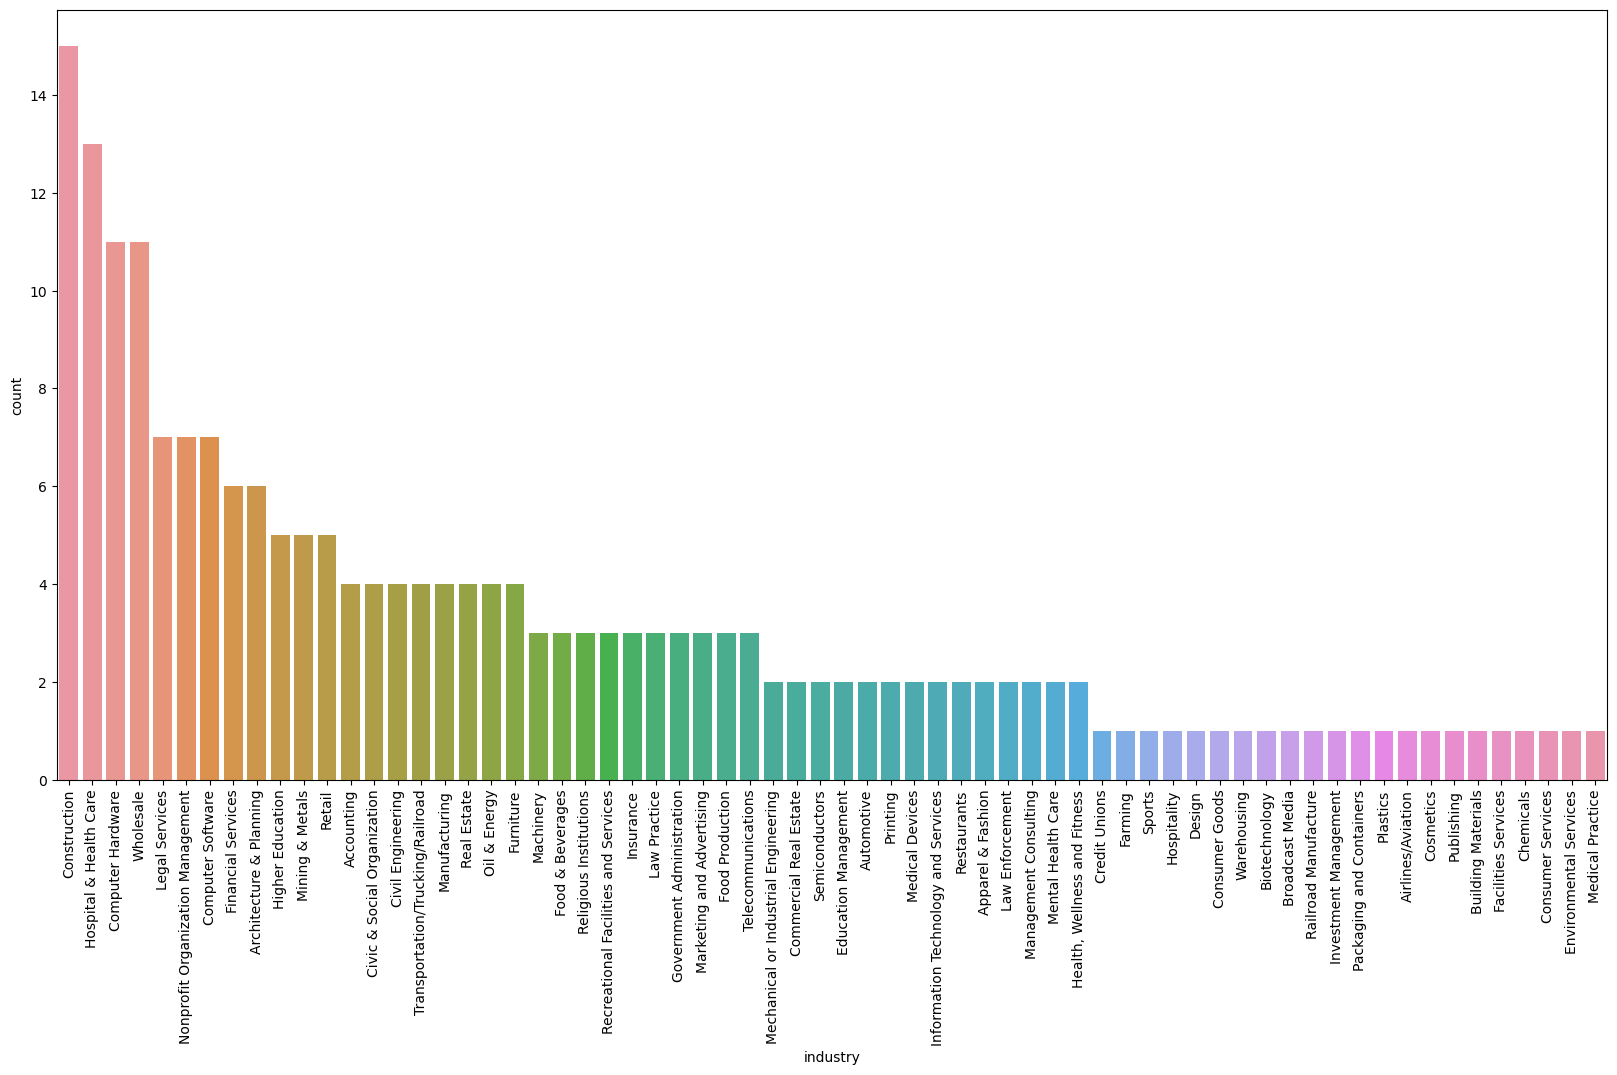

In [112]:
# plot the number of samples for each industry in the United States and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df_country_industry, order=new_df_country_industry['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [113]:
# we will try to answer the following question about the data: Are small companies in Europe vulnerable to attacks, given that companies in the USA rank among the countries most vulnerable to attacks ?

new_df_2 = df_attacked.copy()
# drop the rows with missing values in 'country' or 'employee_range' columns
new_df_2.dropna(subset=['country'], inplace=True)
print(new_df_2.shape)
# count the revenue_range nulls
print(new_df_2['revenue_range'].isnull().sum())
# drop the rows with missing values in 'employees_range' column
new_df_2.dropna(subset=['employees_range'], inplace=True)
print(new_df_2.shape)
# print the unique values for 'employees_range' column
print(new_df_2['employees_range'].unique())

(577, 23)
145
(416, 23)
['1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000']


In [114]:
# check if there are rows with null countries but not null longitude and latitude
df_attacked[df_attacked['country'].isnull() & df_attacked['longitude'].notnull()]


,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded


In [115]:
# check if there are rows with null employee_range but not null country_range

# get the rows with null employee_range but not null country_range
new_df_1 = df_attacked[df_attacked['employees_range'].notnull() & df_attacked['revenue_range'].isnull()]
new_df_1.shape

(0, 23)

In [116]:
new_df_1 = df_attacked[df_attacked['country'].notnull() & df_attacked['employees_range'].isnull()]
new_df_1.shape

(161, 23)

In [117]:
from scipy.stats import chi2_contingency

def statistcal_test(df_attacked,miss_val_col,exp_col):
    # print(df_attacked[miss_val_col].isnull())
    true_col=df_attacked[df_attacked[miss_val_col].isnull()].groupby(exp_col)[exp_col].count()
    false_col=df_attacked[df_attacked[miss_val_col].notna()].groupby(exp_col)[exp_col].count()
    table= pd.concat([true_col,false_col],axis=1)
    table.columns=["True","False"]
    # replace nulls with 0
    table.fillna(0,inplace=True)
    print(table)
    chi2, p, dof, ex = chi2_contingency(table)
    print("The p-value with {} is equal to {}".format(exp_col,p))
    if p<0.05:
        # print("The missingness in the {} column depend on the {} one".format(miss_val_col,exp_col))
        print("it is exptected to be **MAR**")


df_attacked_detect_missings = df_attacked.copy()
# drop the rows with missing values in 'country'
df_attacked_detect_missings.dropna(subset=['country'], inplace=True)
for col in ["country","branches_count", "year_founded", "industry", "revenue_range"]:

    statistcal_test(df_attacked_detect_missings,"employees_range",col)
    print("---------------------------------------------------------")
print("=========================================================")


              True  False
country                  
Argentina      5.0    2.0
Australia      3.0    6.0
Austria        2.0    3.0
Belgium        3.0    7.0
Brazil        12.0    7.0
...            ...    ...
Norway         0.0    1.0
Qatar          0.0    1.0
Saudi Arabia   0.0    1.0
Slovakia       0.0    1.0
Turkey         0.0    1.0

[67 rows x 2 columns]
The p-value with country is equal to 1.3906516141355e-07
it is exptected to be **MAR**
---------------------------------------------------------
                 True  False
branches_count              
0.0             147.0  284.0
1.0               6.0   62.0
2.0               2.0   34.0
4.0               1.0    3.0
5.0               1.0    3.0
18.0              1.0    0.0
21.0              1.0    0.0
48.0              1.0    0.0
828.0             1.0    0.0
3.0               0.0   17.0
6.0               0.0    4.0
7.0               0.0    1.0
8.0               0.0    1.0
9.0               0.0    1.0
17.0              0.0    1.0
2

In [118]:
#get country unique values
print(df_attacked['country'].unique())

['United States' 'India' 'Austria' 'Mexico' 'Italy' 'Belgium' 'Pakistan'
 'Spain' 'Malaysia' 'Morocco' 'Croatia' 'France' 'Germany' 'Hong Kong'
 'Colombia' 'Canada' 'Sweden' 'Japan' 'Kuwait' 'United Arab Emirates'
 'United Kingdom' 'Argentina' 'Switzerland' 'Angola' 'Romania' 'Brazil'
 'Israel' nan 'Bangladesh' 'Thailand' 'Poland' 'Peru' 'Philippines'
 'Vietnam' 'Czech Republic' 'South Africa' 'Australia' 'Taiwan' 'Lebanon'
 'Slovakia' 'Singapore' 'Jordan' 'Netherlands' 'Luxembourg' 'Portugal'
 'Indonesia' 'China' 'Albania' 'Trinidad and Tobago' 'Saudi Arabia'
 'Venezuela' 'New Zealand' 'Monaco' 'Kenya' 'Jamaica' 'Ecuador' 'Norway'
 'Chile' 'Korea, Republic of' 'Costa Rica' 'Turkey' 'Qatar' 'Bulgaria'
 'Nicaragua' 'Ireland' 'Guatemala' 'Barbados'
 'Macedonia, the former Yugoslav Republic of']


In [119]:
european_countries = ['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'France', 'Germany', 'Italy', 'Luxembourg', 'Monaco', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Albania']

In [120]:
#add clumn to check if the country is european or in usa or other
df_attacked['country_type'] = df_attacked['country'].apply(lambda x: 'european' if x in european_countries else ('usa' if x == 'United States' else 'other'))
df_unattacked['country_type'] = df_unattacked['country'].apply(lambda x: 'european' if x in european_countries else ('usa' if x == 'United States' else 'other'))
print(df_attacked['country_type'].unique())
print(df_unattacked['country_type'].unique())

['usa' 'other' 'european']
['european' 'other' 'usa']


In [121]:
# [nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
#  '50 - 200' '500 - 1,000' '> 10,000']

small_compamies = ['1 - 10',  '10 - 50', '50 - 200']
# add column to check if the company is small or not
df_attacked['company_size'] = df_attacked['employees_range'].apply(lambda x: 'small' if x in small_compamies else 'big')
df_unattacked['company_size'] = df_unattacked['employees_range'].apply(lambda x: 'small' if x in small_compamies else 'big')
print(df_attacked['company_size'].unique())
print(df_unattacked['company_size'].unique())

['big' 'small']
['big' 'small']


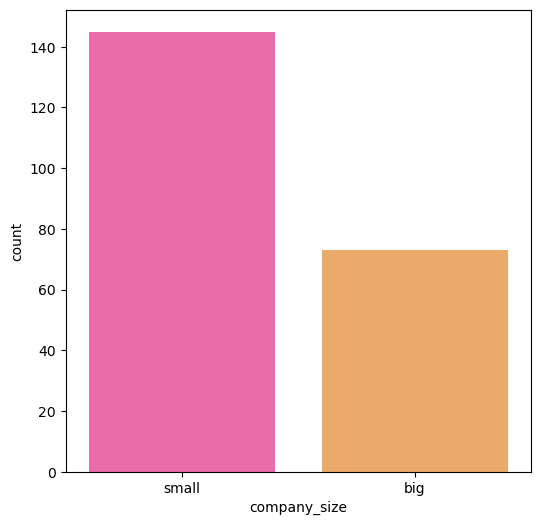

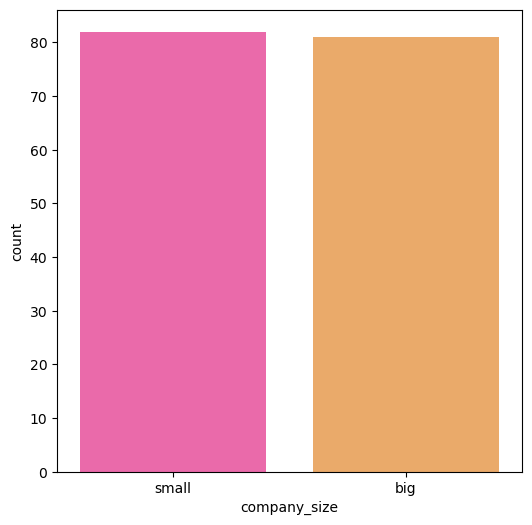

In [122]:
# drow count chart for the company size in usa only
df_usa = df_attacked[df_attacked['country'] == 'United States']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_usa, palette='spring', linewidth=1, order=df_usa['company_size'].value_counts().index)
plt.show()

# drow count chart for the company size in europe only
df_europe = df_attacked[df_attacked['country_type'] == 'european']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_europe, palette='spring', linewidth=1, order=df_europe['company_size'].value_counts().index)
plt.show()

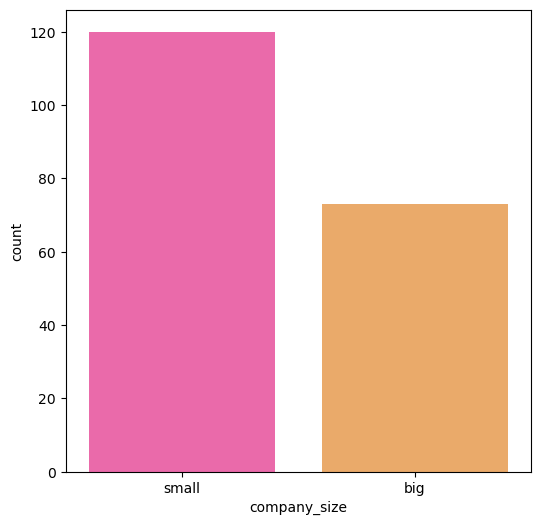

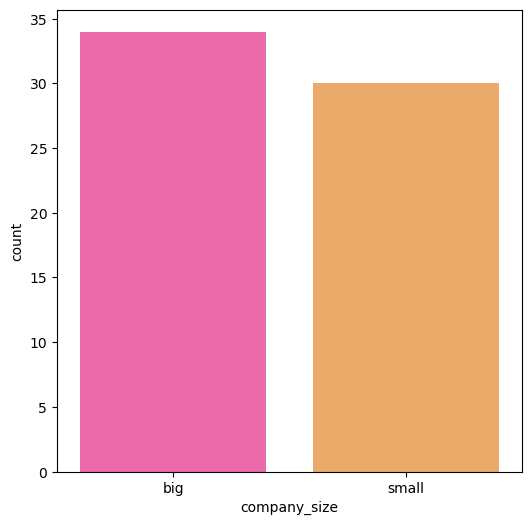

In [123]:
# drow count chart for the company size in usa only
df_usa = df_unattacked[df_unattacked['country'] == 'United States']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_usa, palette='spring', linewidth=1, order=df_usa['company_size'].value_counts().index)
plt.show()

# drow count chart for the company size in europe only
df_europe = df_unattacked[df_unattacked['country_type'] == 'european']
plt.figure(figsize=(6, 6))
sns.countplot(x='company_size', data=df_europe, palette='spring', linewidth=1, order=df_europe['company_size'].value_counts().index)
plt.show()

In [124]:
# applay chi2 test to test our hypothesis
attacked_usa = df_attacked[df_attacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[2]
attacked_europe = df_attacked[df_attacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[0]
print(attacked_usa, attacked_europe)

unattacked_usa = df_unattacked[df_unattacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[2]
unattacked_europe = df_unattacked[df_unattacked["company_size"]=="small"].groupby("country_type")["country_type"].count()[0]
print(unattacked_usa, unattacked_europe)

table = [[attacked_usa, attacked_europe], [unattacked_usa, unattacked_europe]]
chi2, p, dof, ex = chi2_contingency(table)
print("The p-value is equal to {}".format(p))

145 82
120 30
The p-value is equal to 0.001203642351022309


In [125]:
from statsmodels.stats.proportion import proportions_ztest
# Calculate proportion of startups that have been attacked in Europe and USA
prop_europe = len(df_europe[df_europe['company_size']=='small']) / len(df_europe)
prop_usa = len(df_usa[df_usa['company_size']=='small']) / len(df_usa)

#print(prop_europe, prop_usa)
# Calculate sample sizes for Europe and USA
n_europe = len(df_europe)
n_usa = len(df_usa)

# Calculate standard errors for Europe and USA
se_europe = np.sqrt(prop_europe * (1 - prop_europe) / n_europe)
se_usa = np.sqrt(prop_usa * (1 - prop_usa) / n_usa)

# Conduct two-sample proportion test
count = np.array([len(df_europe), len(df_usa)])
nobs = np.array([n_europe, n_usa])
stat, pval = proportions_ztest(count, nobs)

# Print results
print(f"Proportion of startups attacked in Europe: {prop_europe:.4f}")
print(f"Proportion of startups attacked in USA: {prop_usa:.4f}")
print(f"Sample size for Europe: {n_europe}")
print(f"Sample size for USA: {n_usa}")
print(f"Standard error for Europe: {se_europe:.4f}")
print(f"Standard error for USA: {se_usa:.4f}")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Proportion of startups attacked in Europe: 0.4688
Proportion of startups attacked in USA: 0.6218
Sample size for Europe: 64
Sample size for USA: 193
Standard error for Europe: 0.0624
Standard error for USA: 0.0349
Test statistic: nan
P-value: nan


c:\Users\Nada\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning:

invalid value encountered in double_scalars



In [132]:
# fill the missing values in 'employees_range' column using KNN imputer and the columns 'country', 'branches_count', 'revenue_range'
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_attacked_fill_missings = df_attacked.copy()
# drop nan values from the columns 'country'
df_attacked_fill_missings = df_attacked_fill_missings.dropna(subset=['country'])

# get the knn imputer
df_attacked_fill_missings = df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "technologies_used", "year_founded"]]
# convert the 'revenue_range' column from Series object to categorical codes
df_attacked_fill_missings['country'] = df_attacked_fill_missings['country'].astype('category').cat.codes
df_attacked_fill_missings['branches_count'] = df_attacked_fill_missings['branches_count'].astype('category').cat.codes
df_attacked_fill_missings['revenue_range'] = df_attacked_fill_missings['revenue_range'].astype('category').cat.codes
df_attacked_fill_missings['employees_range'] = df_attacked_fill_missings['employees_range'].astype('category').cat.codes
df_attacked_fill_missings['industry'] = df_attacked_fill_missings['industry'].astype('category').cat.codes
# fit the knn imputer
knn_imputer.fit(df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
# fill the missing values with the knn imputer
df_attacked_fill_missings=knn_imputer.transform(df_attacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
df_attacked_fill_missings=pd.DataFrame(df_attacked_fill_missings, columns=["country","branches_count", "revenue_range","employees_range", "industry", "year_founded"])


In [133]:
df_attacked_fill_missings.shape

(577, 6)

In [134]:
# check the missing values
df_attacked_fill_missings.isnull().sum()

country            0
branches_count     0
revenue_range      0
employees_range    0
industry           0
year_founded       0
dtype: int64

In [135]:
#unattacked data
df_unattacked_fill_missings = df_unattacked.copy()
# drop nan values from the columns 'country'
df_unattacked_fill_missings = df_unattacked_fill_missings.dropna(subset=['country'])

# get the knn imputer
df_unattacked_fill_missings = df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]]
# convert the 'revenue_range' column from Series object to categorical codes
df_unattacked_fill_missings['country'] = df_unattacked_fill_missings['country'].astype('category').cat.codes
df_unattacked_fill_missings['branches_count'] = df_unattacked_fill_missings['branches_count'].astype('category').cat.codes
df_unattacked_fill_missings['revenue_range'] = df_unattacked_fill_missings['revenue_range'].astype('category').cat.codes
df_unattacked_fill_missings['employees_range'] = df_unattacked_fill_missings['employees_range'].astype('category').cat.codes
df_unattacked_fill_missings['industry'] = df_unattacked_fill_missings['industry'].astype('category').cat.codes
# fit the knn imputer
knn_imputer.fit(df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
# fill the missing values with the knn imputer
df_unattacked_fill_missings=knn_imputer.transform(df_unattacked_fill_missings[["country", "branches_count", "revenue_range", "industry", "employees_range", "year_founded"]])
df_unattacked_fill_missings=pd.DataFrame(df_unattacked_fill_missings, columns=["country","branches_count", "revenue_range", "industry", "employees_range", "year_founded"])


In [136]:
# check the missing values
df_unattacked_fill_missings.isnull().sum()


country            0
branches_count     0
revenue_range      0
industry           0
employees_range    0
year_founded       0
dtype: int64

In [137]:
# use logistic regression to predict if the company will be attacked or not
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# compine the attacked and unattacked data
df_attacked_fill_missings['attacked'] = 1
df_unattacked_fill_missings['attacked'] = 0
df_attacked_fill_missings = df_attacked_fill_missings.append(df_unattacked_fill_missings)
# split the data into train and test
y = df_attacked_fill_missings['attacked']
X = df_attacked_fill_missings.drop('attacked', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
# predict the test data
y_pred = logistic_regression.predict(X_test)
# print the accuracy score
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
# print the confusion matrix
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
# print the classification report
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.9482
Confusion matrix:
[[ 71   4]
 [  6 112]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        75
           1       0.97      0.95      0.96       118

    accuracy                           0.95       193
   macro avg       0.94      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193



C:\Users\Nada\AppData\Local\Temp\ipykernel_3444\1624735720.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [131]:
# get the companies whose last_seen is before today
df_attacked['last_seen'] = pd.to_datetime(df_attacked['last_seen'])
# get the day of ["last_seen"]
df_attacked['last_seen_day'] = df_attacked['last_seen'].dt.day
# get the month of ["last_seen"]
df_attacked['last_seen_month'] = df_attacked['last_seen'].dt.month
# get the year of ["last_seen"]
df_attacked['last_seen_year'] = df_attacked['last_seen'].dt.year
# get the company that paid, a company who has paid is the company whose last_seen is before the max date
date = df_attacked['last_seen'].max()

df_paid = df_attacked[((df_attacked['last_seen_day']< date.day) & 
(df_attacked['last_seen_month']== date.month) )|
 (df_attacked['last_seen_month']< date.month) | (df_attacked['last_seen_year']< date.year)]
df_paid.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,revenue_range,source,technologies_used,views,year_founded,country_type,company_size,last_seen_day,last_seen_month,last_seen_year
31,645655937adef2f79c969d4c,0.0,abro.se,active,136gb,Sweden,"09 May, 2023 03:14:19 UTC",Åbro Bryggeri är Sveriges äldsta familjebrygge...,AB Åbro Bryggeri,89.0,...,10M - 50M,lockbit,"[""Google Analytics"",""MaxCDN""]",4627,1856.0,european,small,9,5,2023
53,645658397adef2f79c969d62,0.0,bancodevenezuela.com,active,We are an institution with a long history in t...,NaN,"10 May, 2023 06:27:47 UTC",NaN,Banco de Venezuela,NaN,...,NaN,lockbit,"[""Google Analytics"",""WordPress""]",5626,NaN,other,big,9,5,2023
644,6456b5c1c1c9cd75f3a96cab,NaN,asecna.org,NaN,ASECNA\r\nAfrican agency for air traffic control,NaN,"30 Sep, 2022 20:38:47 UTC",NaN,NaN,NaN,...,NaN,lockbit,[],20191,NaN,other,big,9,5,2023
693,6458e6726ac44b66b29d2252,2.0,astate.edu,active,"Founded in 1909, A-State meets the challenges ...",United States,"18 May, 2023 09:52:24 UTC",Arkansas State University (also known as A-Sta...,Arkansas State University-Main Campus,1658.0,...,200M - 1B,lockbit,"[""Google Analytics"",""Google Tag Manager"",""MaxC...",110,1909.0,usa,big,8,5,2023
